# 更多的理想模型
> 海洋学院，沈浙奇，2024年6月，zqshen@hhu.edu.cn

## Lorenz 63
由美国数学家、气象学家洛伦茨(Edward Norton Lorenz，1917~2008年)提出的数值模式经常用于数值天气预报研究，是在孪生试验中被广泛使用的测试模式。Lorenz63模式(Lorenz，1963)是大气可预报性研究中的经典数值模式，其控制方程为

$$\frac{dx}{dt}=\sigma(y-x) \qquad (1)$$
$$\frac{dy}{dt}=\rho x-y-xz \qquad (2)$$
$$\frac{dz}{dt}=xy-\beta z \qquad (3)$$

在方程中，x与对流运动的强度成正比,y与上升流和下降流之间的温度差成正比,z与垂直温度曲线与线性的差异成正比。其中$\sigma$, $\rho$ 和 $\beta$是参数，分别为Prandtl数，Rayleigh数和一个与求解区域相关的参数。

基于该模式，我们已经说明了一些同化的基础概念。

In [1]:
import numpy as np
# 定义模式方程和积分格式
def Lorenz63(state,*args):       #Lorenz63模式
    sigma = args[0]
    beta = args[1]
    rho = args[2]
    x, y, z = state 
    f = np.zeros(3) 
    f[0] = sigma * (y - x)
    f[1] = x * (rho - z) - y
    f[2] = x * y - beta * z
    return f 
def RK4(rhs,state,dt,*args):    # Runge-Kutta格式，输入的rhs代表模式右端方程
    k1 = rhs(state,*args)
    k2 = rhs(state+k1*dt/2,*args)
    k3 = rhs(state+k2*dt/2,*args)
    k4 = rhs(state+k3*dt,*args) # 输出新的一步的状态
    new_state = state + (dt/6)*(k1+2*k2+2*k3+k4)
    return new_state

Text(0.5, 0, 'z')

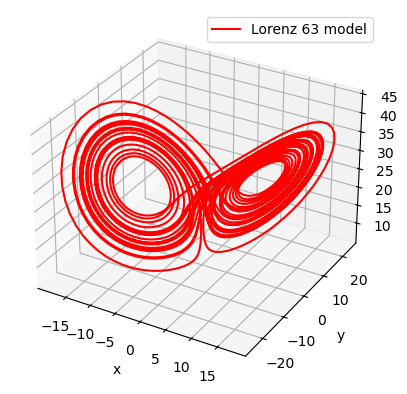

In [2]:
sigma = 10.0; beta = 8.0/3.0; rho = 28.0        # 参数值   
dt = 0.01                                       # 模式步长

x0 = np.array([1.508870, -1.531271, 25.46091])  # 我们也用洛伦茨开展他的实验用的初值，这里的矢量x0代表了(x,y,z)的三个应变量，写成矢量主要为方便编程
Xt = np.zeros([3000,3]);Xt[0]=x0    # 我们积分3000步看看结果，这里涉及python的数组保存方式，第一维代表时间步数，第二维代表x,y,z的3个变量
                                    # 二维数值Xt使用Xt[0]的方式调用时，相当于Xt[0,:]，意味着第一维取0，第二维用全体，所以时间维放前面代码简单
for k in range(2999):             # 从0积分到2999
    Xt[k+1] = RK4(Lorenz63,Xt[k],dt,sigma,beta,rho) 

#%% 画图    
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Xt[:,0], Xt[:,1], Xt[:,2],'r', label='Lorenz 63 model')
ax.legend()
plt.xlabel('x');plt.ylabel('y');
ax.set_zlabel('z')

## Lorenz 96
为了说明可预报性问题，洛伦茨在1996年的一个讲习班中提出了一个新的理想模型，用来模拟一个非特别指定的气象变量的多尺度中纬度大气动力过程。在该模型中，一个纬度圈被划分为K=36个扇区，每个扇区中的变量$X_j$跨越10个经度，且由下列方程控制，

$$\frac{dX_j}{dt}=(X_{j+1}-X_{j-2} ) X_{j-1}-X_j+F, \quad  i=1,…,36,     \qquad (4)    $$

该方程应用循环边界条件，即$X_{-1}=X_{35}$, $X_0=X_{36}$, 以及$X_1=X_{37}$。该模型采用四阶Runge-Kutta方案，时间步长为0.01个无量纲时间单位（TUs）。外强迫$F$被固定为8.0，这使得模型呈现混沌行为。在$F=8$的情况下，就系统的误差增长率而言，单位时间(1TU)对应于5天。

相比于L63，L96模式的特点是变量数目较大，除了典型的36变量的设定外，我们可以进一步假设更大的变量总数（如360），从而测试同化算法在规模相对较大的模式中的效果和不足。

In [3]:
# Lorenz 96模式方程
import numpy as np
def Lorenz96(state,*args):                     # 定义Lorenz 96 模式右端项
    x = state                                  # 模式状态记为x
    F = args[0]                                # 输入外强迫
    n = len(x)                                 # 状态空间维数
    f = np.zeros(n)                          
    f[0] = (x[1] - x[n-2]) * x[n-1] - x[0]     # 处理三个边界点: i=0,1,N-1
    f[1] = (x[2] - x[n-1]) * x[0] - x[1]       # 导入周期边界条件
    f[n-1] = (x[0] - x[n-3]) * x[n-2] - x[n-1]
    for i in range(2, n-1):                  
        f[i] = (x[i+1] - x[i-2]) * x[i-1] - x[i] # 内部点符合方程
    f = f + F                                    # 加上外强迫
    return f
def RK4(rhs,state,dt,*args):                    # 使用Runge-Kutta方法求解（同L63）
    k1 = rhs(state,*args)
    k2 = rhs(state+k1*dt/2,*args)
    k3 = rhs(state+k2*dt/2,*args)
    k4 = rhs(state+k3*dt,*args)
    new_state = state + (dt/6)*(k1+2*k2+2*k3+k4)
    return new_state

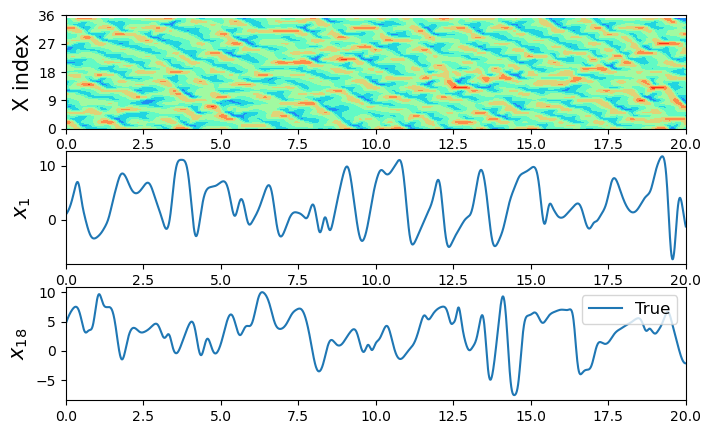

In [4]:
n = 36                      # 状态空间维数
F = 8                       # 外强迫项
dt = 0.01                   # 积分步长
# spinup获取真实场初值: 从 t=-20 积分到 t = 0 以获取实验初值
x0 = F * np.ones(n)         # 初值
x0[19] = x0[19] + 0.01      # 在第20个变量上增加微小扰动
x0True = x0
nt1 = int(20/dt)
for k in range(nt1):
    x0True = RK4(Lorenz96,x0True,dt,F)   #从t=-20积分到t=0
tm = 20                     # 实验窗口长度
nt = int(tm/dt)             # 积分步数
t = np.linspace(0,tm,nt+1)
Xtrue = np.zeros([n,nt+1])
Xtrue[:,0] = x0True
for k in range(nt):
    Xtrue[:,k+1] = RK4(Lorenz96,Xtrue[:,k],dt,F)    # 真值
import matplotlib.pyplot as plt
tt,xx = np.meshgrid(range(36),t)    # 2维画图网格
plt.figure(figsize=(8,5))
plt.subplot(3,1,1)
plt.contourf(xx,tt,Xtrue.T,cmap=plt.cm.rainbow)
plt.ylabel('X index',fontsize=15);plt.yticks(np.arange(0,37,9))
plt.subplot(3,1,2)
plt.plot(t,Xtrue[0,:],label='True')
plt.xlim(0,20);plt.ylabel(r'$x_1$',fontsize=15)
plt.subplot(3,1,3)
plt.plot(t,Xtrue[17,:],label='True')
plt.xlim(0,20);plt.ylabel(r'$x_{18}$',fontsize=15)
plt.legend(ncol=2,loc='upper right', fontsize=12)

## 5变量概念海气耦合模型（5VCCM）

洛伦兹系统最初是从Oberbeck-Bossinesq近似推导出来的。Oberbeck-Boussinesq近似（简称OB近似）是流体力学中的一个简化模型，用于描述在某些条件下，流体的密度变化对流体动力学的影响可以忽略不计的情况。这个近似通常用于处理流体的层流问题，尤其是在流体的密度变化相对于其他影响因素（如速度场）较小的情况下。这种近似是Navier-Stokes方程与热对流的耦合。最初的问题是考虑两个平行水平板之间的热对流的二维问题。洛伦兹系统是通过使用截断傅立叶-伽辽金展开而产生的。也就是说，在考虑两个有温度差的平板的热对流问题中，把二维的流函数$\psi$和温度分布函数$\phi$都做傅立叶-伽辽金展开，$\psi$的一阶展开系数$a$和$\phi$的前两阶展开系数$b$和$c$进行一定的重整，就可以得到L63模式方程（1）-（3）。所以洛伦茨模式中的第一个变量是动力变量，第二第三个都是热力变量。

![fig2](pic/figure2.png)

如果用来研究数据同化问题的话，Lorenz63模式还是过于简单了。为了适应现实世界中各种不同的系统耦合的特点，我们至少还要引入描述海洋的方程，将其与洛伦兹模型耦合在一起，以此来构建一个描述地球流体的概念模型。

考虑一个最简单的“板块海洋”模型（slab ocean model），即一个充分简化了的海洋模型，本质上是一个运行在每个海洋格点上的0维模型。在此处忽略海洋的水平结构，只考虑海洋的混合层温度异常$w$。这里考虑了大气变量，温度的耗散项和外界的强迫项对$w$的影响。为简单起见，仅考虑$x_2$与$w$的相互作用，温度的耗散项与温度呈线性关系，同时外界强迫表现为常值年平均强迫$S_m$和季节强迫循环$S_s\cos(2\pi t/S_{pd})$。

Lorenz63模式的大气加上平板的海洋，我们可以得到四变量模式：
$$
\begin{aligned}
&\dot{x}_1=-\sigma x_1+\sigma x_2  ,\qquad (5)\\
&\dot{x}_2=-x_1 x_3+\left(1+c_1 w\right) \kappa x_1-x_2,\qquad (6)\\
&\dot{x}_3=x_1 x_2-b x_3,\qquad (7)\\
&O_m  \dot{w}=c_2 x_2-O_d w+S_m+S_s \cos \left(2 \pi t / S_{\mathrm{pd}}\right),\qquad (8)
\end{aligned}
$$

对于这些变量所对应的参数的取值，需要考虑以下的基本事实：
1. 海洋变量 $w$与大气变量相比，是一个相当低频的、慢变的信号。在(8)式的两端除以$O_d$，等号左端的$\dot{w}$若很小，则$O_m/O_d$应较大,这样才能与$w$的量级相当，即$O_m>>O_d$，实验中一般取10倍的大小差异，代表海洋变化的时间尺度约为10，估$O_m$和$O_d$，分别取10和1；
2. $S_{pd}$被认为是外界强迫的周期，为使其与海洋变化的时间尺度可比，一般取10；
3. $S_m$和$S_s$在测试中发现对结果不大，一般取10和1；
4. $c_1$和$c_2$分别代表海洋对大气和大气对海洋的影响，在模型测试中发现大气模型在$c_1$比0.1大得多时会出现不稳定现象，而 $c_2$对结果影响不大。故$c_1$和$c_2$分别取0.1与1。
5. $\kappa$即为洛伦兹模型中的$\rho$，这些大气模型中的参数均与洛伦兹模型保持一致。

考虑到海洋还有一个重要分量就是温跃层，进一步引入Gnanadesikan在1999年发展的纬向平均温跃层平衡模型：Gnanadesikan认为在赤道上升的热通量$T_uD$与北半球下沉的净输送减去南大洋向北的埃克曼通量$(T_n-T_s)D$相平衡，$D$为纬向平均的温跃层深度。而温跃层深度的异常值$\eta$源于上述的两项的不平衡，即

$\Gamma \dot{\eta}=T_u\eta-(T_n-T_s)\eta$

Gnanadesikan认为$T_u\eta$可以用低纬度区域的总垂向扩散来近似，在板块海洋模型中，即$T_u\eta\approx c_5 w$，同时用海洋的耗散系数$O_d$来代替$(T_n-T_s)$的作用。通常$\eta$变化的尺度比$w$的季节循环大一个数量级以上，即10倍的$S_{pd}$,故取$\Gamma$为100 。为了考虑上层海洋与深层海洋的非线性作用，这里还引入了乘积项$w\eta$，在上层海洋中非线性作用强于深层海洋，估$c_4>>c_6$，取$c_4$=0.01，$c_6=0.001$。所以，得到的五变量模式可以写成。

\begin{aligned}
&\dot{x}_1=-\sigma x_1+\sigma x_2\\
&\dot{x}_2=-x_1 x_3+\left(1+c_1 w\right) \kappa x_1-x_2\\
&\dot{x}_3=x_1 x_2-b x_3\\
&O_m  \dot{w}=c_2 x_2+c_3 \eta+c_4 w \eta-O_d w+S_m+S_s \cos \left(2 \pi t / S_{pd}\right)\\
&\Gamma  \dot{\eta}=c_5 w+c_6 w \eta-O_d \eta
\end{aligned}

参数取值为

$$\begin{aligned}&(\sigma,\kappa,b,c_{1},c_{2},O_{m},O_{d},S_{m},S_{s},S_{pd},\Gamma,c_{3},c_{4},c_{5},c_{6})\\&=(9.95,28,8/3,0.1,1,10,1,10,1,10,100,10^{-2},10^{-2},1,10^{-3})\end{aligned}$$

该模式由于包含不同尺度的多个成分，适合研究耦合同化相关的问题。

In [5]:
def l63_5v(x, t, params): # 定义模式
    s, k, b, c1, c2, od, om, sm, ss, spd, g, c3, c4, c5, c6 = params
    dx = np.zeros_like(x)
    dx[0] = -s*x[0]+s*x[1]
    dx[1] = -x[0]*x[2]+(1+c1*x[3])*k*x[0]-x[1]
    dx[2] = x[0]*x[1]-b*x[2]
    dx[3] = (c2*x[1]+c3*x[4]+c4*x[3]*x[4]-od*x[3]+sm+ss*np.cos(2*np.pi*t/spd))/om
    dx[4] = (c5*x[3]+c6*x[3]*x[4]-od*x[4])/g
    return dx
def l63_5v_rk4(state,t,dt,params):           # 由于l63_5v还涉及到当前时间t，将RK积分写成如下形式
    k1 = l63_5v(state,t,params)
    k2 = l63_5v(state+k1*dt/2,t,params)
    k3 = l63_5v(state+k2*dt/2,t,params)
    k4 = l63_5v(state+k3*dt,t,params)
    new_state = state + (dt/6)*(k1+2*k2+2*k3+k4)
    return new_state

In [6]:
sigma=9.95; kappa=28.; beta=8/3
c1=0.1;c2=1.
Od=1.;Om=10.
Sm=10.;Ss=1.;Spd=10.
Gamma=100.
c3=.01;c4=.01;c5=1.;c6=.001
params = [sigma, kappa, beta, c1, c2, Od, Om, Sm, Ss, Spd, Gamma, c3, c4, c5, c6]

dt = 0.01                                       # 模式步长

x0 = np.array([1,1,1,0,0])          # 初值用于spinup
Xsp = np.zeros([4000,5]);Xsp[0]=x0  # 
time = 0
for k in range(3999):             # 从0积分到3999
    time += dt;
    Xsp[k+1] = l63_5v_rk4(Xsp[k],time,dt,params)

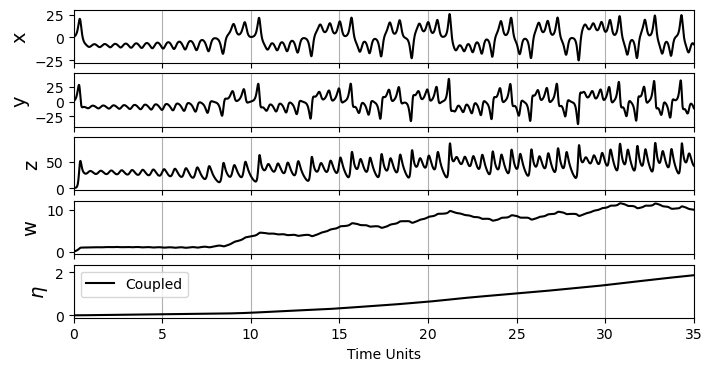

In [20]:
plt.figure(figsize=(8,4))
Ylabels = ['x','y','z','w',r'$\eta$']
for j in range(5):
    plt.subplot(5,1,j+1)
    plt.plot(dt*np.arange(0,4000), Xsp[:,j],'k', label='Coupled')
    plt.xlim(0,30);plt.ylabel(Ylabels[j],fontsize=14)
    plt.grid(axis='x')
    if j<4:
        plt.xticks(dt*np.arange(0,4000,500),[])
    if j==4:
        plt.legend(ncol=2);plt.xlabel('Time Units')
        plt.xticks(dt*np.arange(0,4000,500))

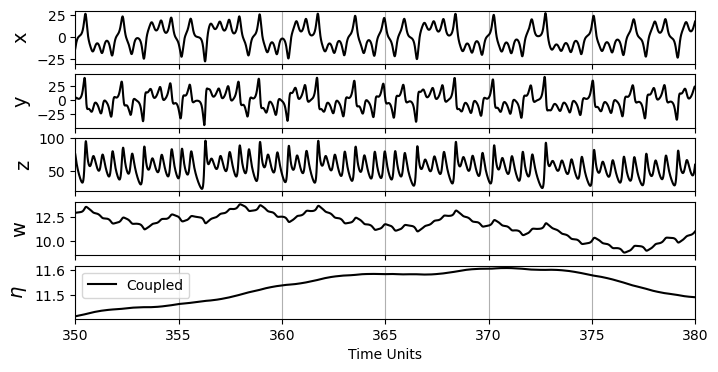

In [22]:
x0 = Xsp[-1]    # spinup的最后结果作为初值。
Xtrue = np.zeros([38000,5]);Xtrue[0]=x0  # 
time = 0
for k in range(37999):             # 从0积分到3999
    time += dt;
    Xtrue[k+1] = l63_5v_rk4(Xtrue[k],time,dt,params)
plt.figure(figsize=(8,4))
Ylabels = ['x','y','z','w',r'$\eta$']
for j in range(5):
    plt.subplot(5,1,j+1)
    plt.plot(dt*np.arange(35000,38000), Xtrue[35000:38000,j],'k', label='Coupled')
    plt.xlim(350,380);
    plt.ylabel(Ylabels[j],fontsize=14)
    plt.grid(axis='x')
    if j<4:
        plt.xticks(dt*np.arange(35000,38001,500),[])
    if j==4:
        plt.legend(ncol=2);plt.xlabel('Time Units')
        plt.xticks(dt*np.arange(35000,38001,500))

Text(0.5, 0, 'z')

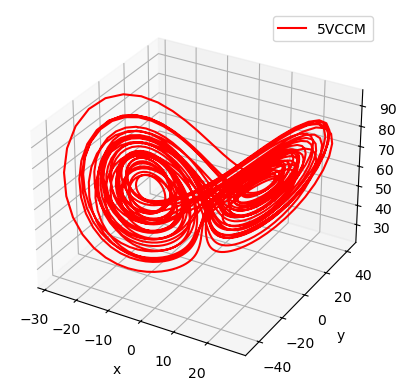

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(Xtrue[35000:38000,0], Xtrue[35000:38000,1], Xtrue[35000:38000,2],'r', label='5VCCM')
ax.legend()
plt.xlabel('x');plt.ylabel('y');
ax.set_zlabel('z')

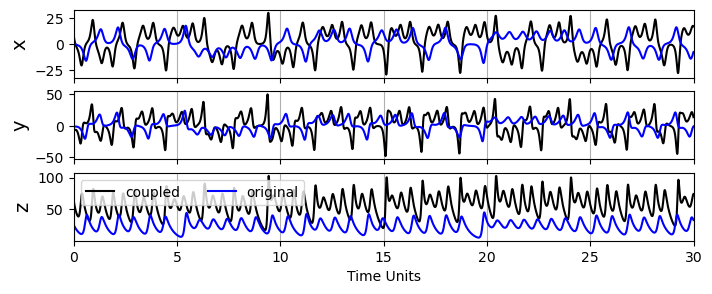

In [14]:
plt.figure(figsize=(8,3))
Ylabels = ['x','y','z']
for j in range(3):
    plt.subplot(3,1,j+1)
    plt.plot(dt*np.arange(0,3000), Xtrue[30000:33000,j],'k', label='coupled')
    plt.plot(dt*np.arange(0,3000), Xt[:,j],'b', label='original')
    plt.xlim(0,30);plt.ylabel(Ylabels[j],fontsize=14)
    plt.grid(axis='x')
    if j<2:
        plt.xticks(dt*np.arange(0,3001,500),[])
    if j==2:
        plt.legend(ncol=2);plt.xlabel('Time Units')
        plt.xticks(dt*np.arange(0,3001,500))

由于加入了海洋的作用，五变量模式中大气变量的变化和原来的L63模式的大气变量有一定的区别。

而由于大气、海洋的混合层温度异常、密度跃层深度异常这三组变量有不同的时间尺度，因此可以讨论更复杂的耦合同化问题。



此外，还有一个6变量的概念耦合模式，也是在这个五变量模式的基础上，加上了海冰模块。

## 6变量概念海-气-冰耦合模型（6VCCM）

\begin{aligned}
&\dot{x}_1=-\sigma x_1+\sigma x_2\\
&\dot{x}_2=-x_1 x_3+\left(1+c_1 w\right) \kappa x_1-x_2\\
&\dot{x}_3=x_1 x_2-b x_3\\
&O_m  \dot{w}=c_2 x_2+c_3 \eta+c_4 w \eta-O_d w+S_m+S_s \cos \left(2 \pi t / S_{\mathrm{pd}}\right)-c_7 \varphi_{t-1}\\
&\Gamma  \dot{\eta}=c_5 w+c_6 w \eta-O_d \eta\\
&\varphi_t=\Phi\left(x_2, w, \varphi_{t-1}\right),
\end{aligned}

其中，六个模型变量代表大气、海洋和海冰：$x_1$、$x_2$和$x_3$代表大气，$w$代表平板海洋的温度异常，$\eta$代表密度跃层深度的异常，$\phi$代表海冰密集度。变量上方的点表示时间趋势（时间导数）。对于洛伦兹大气，原始参数$\sigma$、$\kappa$和$b$的标准值为9.95、28和8/3，可以维持大气的混沌性质，而$c_1$表示海洋对大气的强迫。对于$w$的方程，$O_m$是海洋的热容量，$c_2$代表大气对海洋的强迫作用。参数$c_3$和$c_4$表示深海的线性强迫和上层海洋与深海的非线性相互作用。参数$O_d$表示平板海洋变量$w$的阻尼系数。参数$S_m$和$S_s$定义了作用力的年平均和季节性周期的大小。参数$S_{pd}$被选为10，以使强迫的周期与海洋时间尺度相当，定义了模型季节性周期的时间尺度。参数$c_7$是海冰与板块海洋的耦合系数。对于密度跃层深度方程，$\eta$代表海洋密度跃层深度的异常，其方程来自于前面提到的纬向的时间平均密度跃层深度的二项平衡模型（Gnanadesikan，1999）。$\Gamma$是一个比例常数，而$c_5$和$c_6$代表上层海洋的线性强迫和上层海洋与深层海洋的非线性相互作用。最后，海冰模型是一个简单的非线性函数，将一个焓空间转移到海冰浓度空间。

为了解决海冰浓度分布不连续引起的同化问题。（Zhang等人，2013）引入了焓（$H = c_8x^2_2+c_9(w-10)^2+c_{10}\phi_{t-1}$）这个极其简化的$x_2$、$w$和$\phi$的非线性函数来定义海冰介质。从焓值到冰浓度的非线性转换函数是

$$\varphi=\Phi(H)
=\left\{\begin{array}{ll}
0, & H>H_{\mathrm{ig}} \\
1, & H<H_{\mathrm{im}} \\
0.5\left[e^{-\left(H-H_{\mathrm{im}}\right)^{-1}}+e^{-\left(H_{\mathrm{ig}}-H\right) / H_0}\right], & H_{\mathrm{im}} \leq H \leq H_{\mathrm{ig}}
\end{array},\right.
$$

其中$H_{ig}$和$H_{im}$分别代表冰的生成点和冰的维持点的焓值阈值，$H_0$是一个系数，用于在0和1之间调整曲线的形状。

该模型设定的参数值为($\sigma$,$\kappa$, $b$, $c_1$, $c_2$, $c_3$, $c_4$, $c_5$, $c_6$, $c_7$, $c_8$, $c_9$, $c_{10}$, $O_m$, $O_d$, $S_m$, $S_s$, $S_{pd}$, $\Gamma$, $\gamma$, $H_{ig}$, $H_{im}$, $H_0$)=(9. 95，28，8/3，0.1，1，0.01，0.01，1，0.01，0.1，0.1，10，10，10，1，10，1，10，100，0.25，50，10，80)。